<a href="https://colab.research.google.com/github/ShadaabHasan/MP305/blob/main/Lab4_Game_Theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Game Theory MP305

## Overview

This file contains two Python functions for analysing two player $m\times n$ matrix games i.e. a zero sum game where player $A$ has $m$ strategies $A_{1},\ldots, A_{m}$ and player $B$ has $n$ strategies $B_{1},\ldots B_{n}$.

The given payoff matrix `Pay` is defined by an array e.g. `Pay=[[1,2,3],[0,-2,-2]]` for a $2\times 3$ game.

## The function `Saddle`
This determines whether a matrix game described by a payoff matrix `Pay` has a saddle point solution. The function finds the minimax and the maximin which are equal iff a saddle solution exists  

## The function `MatrixGame2n`
This determines the optimal mixed solution for a $2\times n$ matrix games with payoff matrix `Pay` i.e. player $A$ has two strategies $A_{1},A_{2}$ and player $B$ has $n$ strategies $B_{1},\ldots ,B_{n}$.

The output shows the average payoff $U_{j}(p)$ to player $A$ against strategy $B_{j}$ for $j=1,\ldots,n$ where $A$ plays a mixed strategy choosing  $A_{1}$ with probability $p$ and $A_{2}$ with probability $1-p$. The optimal choice for $p$ is also computed where the average loss is minimized for player $A$.


In [1]:
from fractions import Fraction
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex

## The function `Saddle`
This determines whether a matrix game described by a payoff matrix `Pay` has a saddle point solution. The function finds the minimax and the maximin which are equal iff a saddle solution exists  


In [2]:
def Saddle (Pay):
    a = np.matrix(Pay)
    m,n = a.shape
    minimax = max(a[i,0] for i in range(m))
    for j in range(1, n):
        minimax = min(minimax, max(a[i,j] for i in range(m)))
    maximin = min(a[0,j] for j in range(n))
    for i in range(1, m):
        maximin = max(maximin, min(a[i,j] for j in range(n)))
    if maximin == minimax:
        print("Saddle Point Solution exists with Value", maximin)
    else:
        print("No Saddle Point Solution Exists")
        print("The minimax is ", minimax)
        print("The maximin is ", maximin)


## Some Examples

In [3]:
Pay1=[[1,2],[0,-2]]

Saddle(Pay1)

Saddle Point Solution exists with Value 1


In [4]:
Pay2=[[0,13,-5,1],[-13,0,8,-12],[5,-8,0,6],[-1,12,-6,0]]

Saddle(Pay2)

No Saddle Point Solution Exists
The minimax is  5
The maximin is  -5


In [5]:
Pay3=[[1, 2, 4, 0], [0, -2, -3, 2]]

Saddle(Pay3)

No Saddle Point Solution Exists
The minimax is  1
The maximin is  0


In [6]:
Pay4=[[1, 4, 0], [1, -2, 4], [-1, 2, 3]]

Saddle(Pay4)

No Saddle Point Solution Exists
The minimax is  1
The maximin is  0


## The function `MatrixGame2n`
This determines the optimal mixed solution for a $2\times n$ matrix game with payoff matrix `Pay`.  

In [7]:
def MatrixGame2n(Pay):
# function to analyse 2 matrix game with 2 by n pay-off Pay
    a=np.matrix(Pay)
    m,n=a.shape
    if not m==2:
        return("Warning: The Payoff matrix is not 2 by n")
    U=set()
    for j in range(n):
        U=U | set([(a[0,j]-a[1,j],a[1,j])]) # Utility U[j][0]p + U[j][1]
    p0=0
    Umaxmin=min([a[1,j] for j in range(n)]) # min at p=0
    pmaxmin=p0

    # find Uj with min at p0

    while not U==set():
        Umin=list(U)[0] # pick element of U
        for Uj in U:
            Ujp0=p0*Uj[0]+Uj[1]
            if Ujp0<Umin[1]:
                Umin=Uj
        # intercepts with Umin
        Unew=set()
        pintlist=[]
        for Uj in U:
            if Uj[0]<Umin[0]: #slope Uj< slope Umin
                pintj=-Fraction((Uj[1]-Umin[1]),(Uj[0]-Umin[0]))
                Upintj=pintj*Uj[0]+Uj[1]
                if pintj >=0 and pintj <=1:
                    pintlist=pintlist+[pintj]
                    Unew=Unew | set([Uj]) # reduced Uj set
        U=Unew
        if U==set():
            Up1=Umin[0]+Umin[1]
            if Umaxmin<Up1: # unique positive slope min Uj
                pmaxmin=1
                Umaxmin=Up1
        else:
            p0=min(pintlist)
            Up0=p0*Umin[0]+Umin[1]
            if Umaxmin<Up0:
                pmaxmin=p0
                Umaxmin=Up0
            if len(U)==1:
                Up1=list(U)[0][0]+list(U)[0][1]
                if Umaxmin<Up1:
                    pmaxmin=1
                    Umaxmin=Up1
    print("Optimal strategy is (A_1,A_2) played with probabilities (",pmaxmin,",",1-pmaxmin, ") and with average pay-off of",Umaxmin)
    plt.figure(figsize=(7, 7))
    plt.xlim([0, 1])
    plt.xlabel('p',size=15)
    plt.ylabel('Average Payoff',size=15)
    plt.plot([pmaxmin], [Umaxmin], marker=".", markersize=30)
    for j in range(n):
        plt.plot([0,1],[a[1,j],a[0,j]])

[[1, 2], [0, -2]]
Saddle Point Solution exists with Value 1
Optimal strategy is (A_1,A_2) played with probabilities ( 1 , 0 ) and with average pay-off of 1


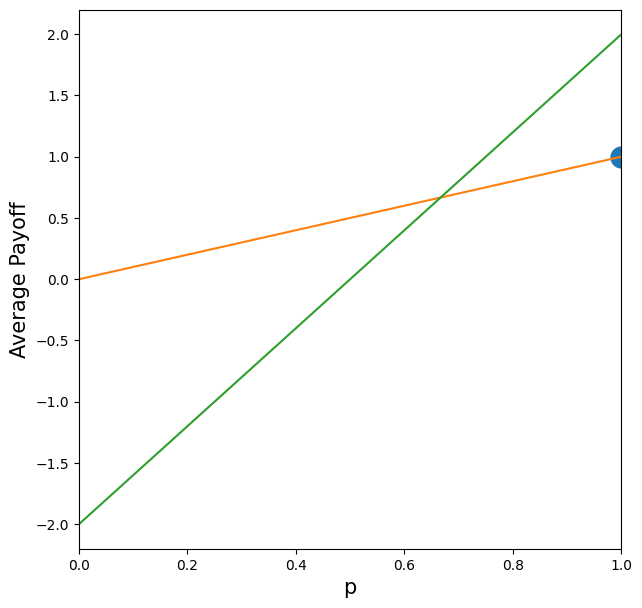

In [8]:
print(Pay1)
Saddle(Pay1)
MatrixGame2n(Pay1)

In [9]:
print(Pay2)
Saddle(Pay2)
MatrixGame2n(Pay2)

[[0, 13, -5, 1], [-13, 0, 8, -12], [5, -8, 0, 6], [-1, 12, -6, 0]]
No Saddle Point Solution Exists
The minimax is  5
The maximin is  -5


'Warning: The Payoff matrix is not 2 by n'

[[1, 2, 4, 0], [0, -2, -3, 2]]
No Saddle Point Solution Exists
The minimax is  1
The maximin is  0
Optimal strategy is (A_1,A_2) played with probabilities ( 2/3 , 1/3 ) and with average pay-off of 2/3


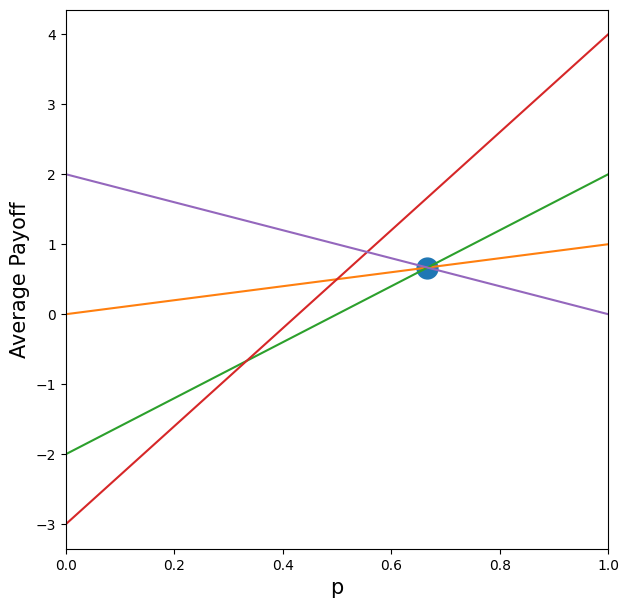

In [10]:
print(Pay3)
Saddle(Pay3)
MatrixGame2n(Pay3)

In [11]:
print(Pay4)
Saddle(Pay4)
MatrixGame2n(Pay4)

[[1, 4, 0], [1, -2, 4], [-1, 2, 3]]
No Saddle Point Solution Exists
The minimax is  1
The maximin is  0


'Warning: The Payoff matrix is not 2 by n'

No Saddle Point Solution Exists
The minimax is  0
The maximin is  -13
Optimal strategy is (A_1,A_2) played with probabilities ( 1/2 , 1/2 ) and with average pay-off of -13/2


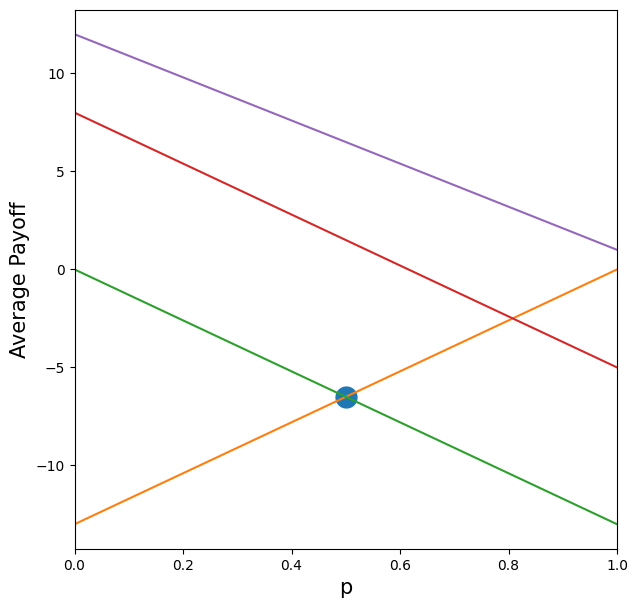

In [12]:
Pay=[[0,-13,-5,1],
     [-13,0,8,+12]]
Saddle(Pay)
MatrixGame2n(Pay)

## Q1 (*)
Analyse the following matrix games and determine whether or not a saddle point solution exists for the following pay-off matrices.

(i) The $2\times2$ game:
\begin{array}{|c|c|c|}
\hline
& B_{1} & B_{2} \\ \hline
A_{1} & 1 & 2 \\ \hline
A_{2} & 0 & -2 \\ \hline
\end{array}

In [15]:
PayA = PayB = [[1,2],[0,-2]]
Saddle(PayA)

Saddle Point Solution exists with Value 1


(ii) The two coin game:
\begin{array}{|c|c|c|}
\hline
& B_{1} & B_{2} \\ \hline
A_{1} & 1 & -1 \\ \hline
A_{2} & -1 & 1 \\ \hline
\end{array}

In [16]:
PayC = PayD = [[1,-1],[-1,1]]
Saddle(PayC)

No Saddle Point Solution Exists
The minimax is  1
The maximin is  -1


(iii) The $2\times 4$ game:
\begin{array}{|c|c|c|c|c|}
\hline
& B_{1} & B_{2} & B_{3} & B_{4} \\ \hline
A_{1} & 1 & 2 & 4 & 0 \\ \hline
A_{2} & 0 & -2 & -3 & 4 \\ \hline
\end{array}

In [18]:
PayE = PayF = [[1,2,4,0],[0,-2,-3,4]]
Saddle(PayE)

No Saddle Point Solution Exists
The minimax is  1
The maximin is  0


(iv) The $2\times 5$ game:
\begin{array}{|c|c|c|c|c|}
\hline
& B_{1} & B_{2} & B_{3} & B_{4} & B_{5} \\ \hline
A_{1} & 1 & 0 & 4 & 1 &-1\\ \hline
A_{2} & -1 & -4 & -3 & 4 &2\\ \hline
\end{array}

No Saddle Point Solution Exists
The minimax is  0
The maximin is  -1
Optimal strategy is (A_1,A_2) played with probabilities ( 6/7 , 1/7 ) and with average pay-off of -4/7


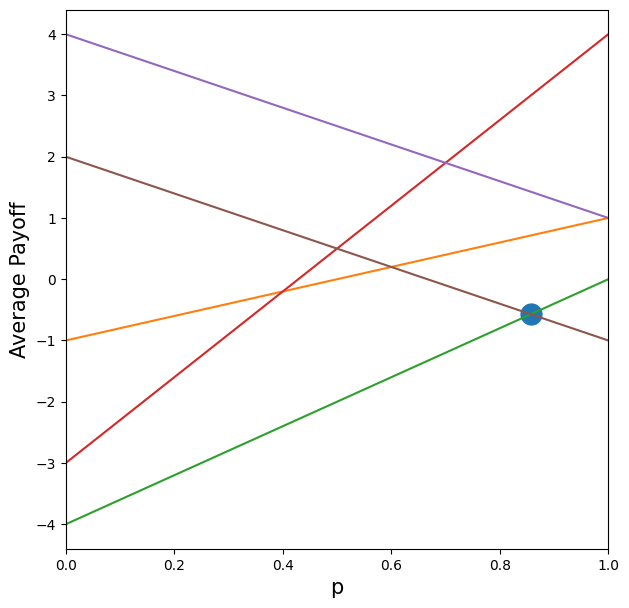

In [20]:
PayG = PayH = [[1,0,4,1,-1],[-1,-4,-3,4,2]]
Saddle(PayG)
MatrixGame2n(PayG)

(v) The game of "odd-even":
\begin{array}{|c|c|c|c|}
\hline
& B_{1} & B_{2} & B_{3} \\ \hline
A_{1} & 0 & 2 & -1 \\ \hline
A_{2} & -2 & 0 & 3
\\ \hline
A_{3} & 1 & -3 & 0
\\ \hline
\end{array}

In [26]:
Pay1 = [[0,2,-1],[-2,0,3],[1,-3,0]]
Saddle(Pay1)
MatrixGame2n(Pay1)

No Saddle Point Solution Exists
The minimax is  1
The maximin is  -1


'Warning: The Payoff matrix is not 2 by n'

(vi) The $4\times 4$ game:
\begin{array}{|c|c|c|c|c|}
\hline
& B_{1} & B_{2} & B_{3} & B_{4} \\ \hline
A_{1} & 0 & 13 & -5 & 1 \\ \hline
A_{2} & -13 & 0 & 8 & -12 \\ \hline
A_{3} & 5 & -8 & 0 & 6 \\ \hline
A_{4} & -1 & 12 & -6 & 0 \\ \hline
\end{array}

In [30]:
Pay2 = [[0,13,-5,1],[-13,0,8,-12],[5,-8,0,6],[-1,12,-6,0]]
Saddle(PayA)
MatrixGame2n(Pay2)

Saddle Point Solution exists with Value 1


'Warning: The Payoff matrix is not 2 by n'

## Q2(*)
Analyze the previous games (iii) and (iv)  where $A$ has two strategies $A_{1}$ and $A_{2}$ chosen with probability $p$ and $1-p$ respectively.

(i) Find the average payoff $U_{j}(p)$ against  strategy $B_{j}$ for each $j=1,\ldots,n$.

(ii) Find the optimal choice of $p$  by diagrammatic means.

(iii) Find  two strategies that $B$ must play to minimize their loss.

(iv) Find the optimal mixed strategy for $B$.